# Plot Precipitation

## Winter (Dec-Jan-Feb) averaged precipitation in the 50 member CESM2 large ensemble

In this notebook you'll read in data from 50 members of the CESM2 large ensemble and explore the climate change response and the uncertainty due to internal variability in the winter means of precipitation

<h3>Load the functions necessary for the computations</h3>
<h3><font color='red'>Cell 1</font></h3>

In [1]:
# Execute this cell to load the functions necessary for the computations
from functions import *
import xarray as xr
import matplotlib.pyplot as plt
from math import nan
import warnings
warnings.filterwarnings('ignore')
import sys

<h3>Execute the cell below to read in the data.  This will take a moment</h3>

<h3><font color='red'>Cell 2</font></h3>

In [2]:
# Model ensemble
pr = xr.open_dataset("/scratch/data/lens2_data/PRECT_LENS2_djf_second50.nc").PRECT
pr['time'] = pr.time.dt.year
landfrac = xr.open_dataset("/scratch/data/lens2_data/LANDFRAC_LENS2.nc").landfrac
pr['lon'] = landfrac.lon ; pr['lat'] = landfrac.lat
pr = pr*landfrac

# Observations
obs = xr.open_dataset("/scratch/data/lens2_data/GPCC_precip.nc").precip
obs['time'] = obs.time.dt.year

<h3>We'll look again at the projected change of the average of 10 winters and compare relative to the 10 winters from 1980-1989.  Feel free to change start_year_of_decade to a different value to explore the model's forced climate change response (you won't see any observations of the future)</h3>

<h3><font color='red'>Cell 3</font></h3>

You're now going to look at the decade from 2010 to 2019


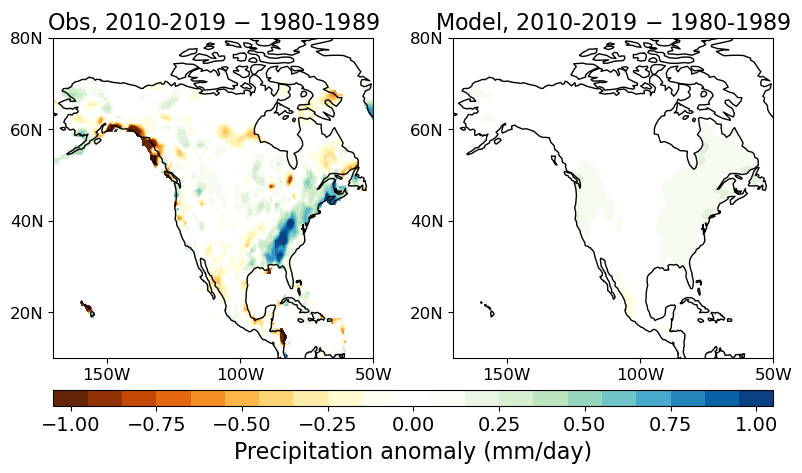

In [3]:
start_year_of_decade = 2010
print("You're now going to look at the decade from "+str(start_year_of_decade)+" to "+str(start_year_of_decade+9))

if (  (start_year_of_decade < 1980) | (start_year_of_decade > 2091)):
    print("!!! This won't work, you can only look at decades between 1980 and 2100")
    sys.exit()
    

fig = plt.figure(figsize=(16,16))

fig = plot_prmap_ensemblemean(fig, obs, pr, start_year_of_decade)

### Here you can plot the individual members from the ensemble.  Feel free to modify the members that are plotted by changing the numbers in the members array.  Note that you can only have a maximum of 12 members

<h3><font color='red'>Cell 4</font></h3>

You're now going to look at the decade from 2010 to 2019


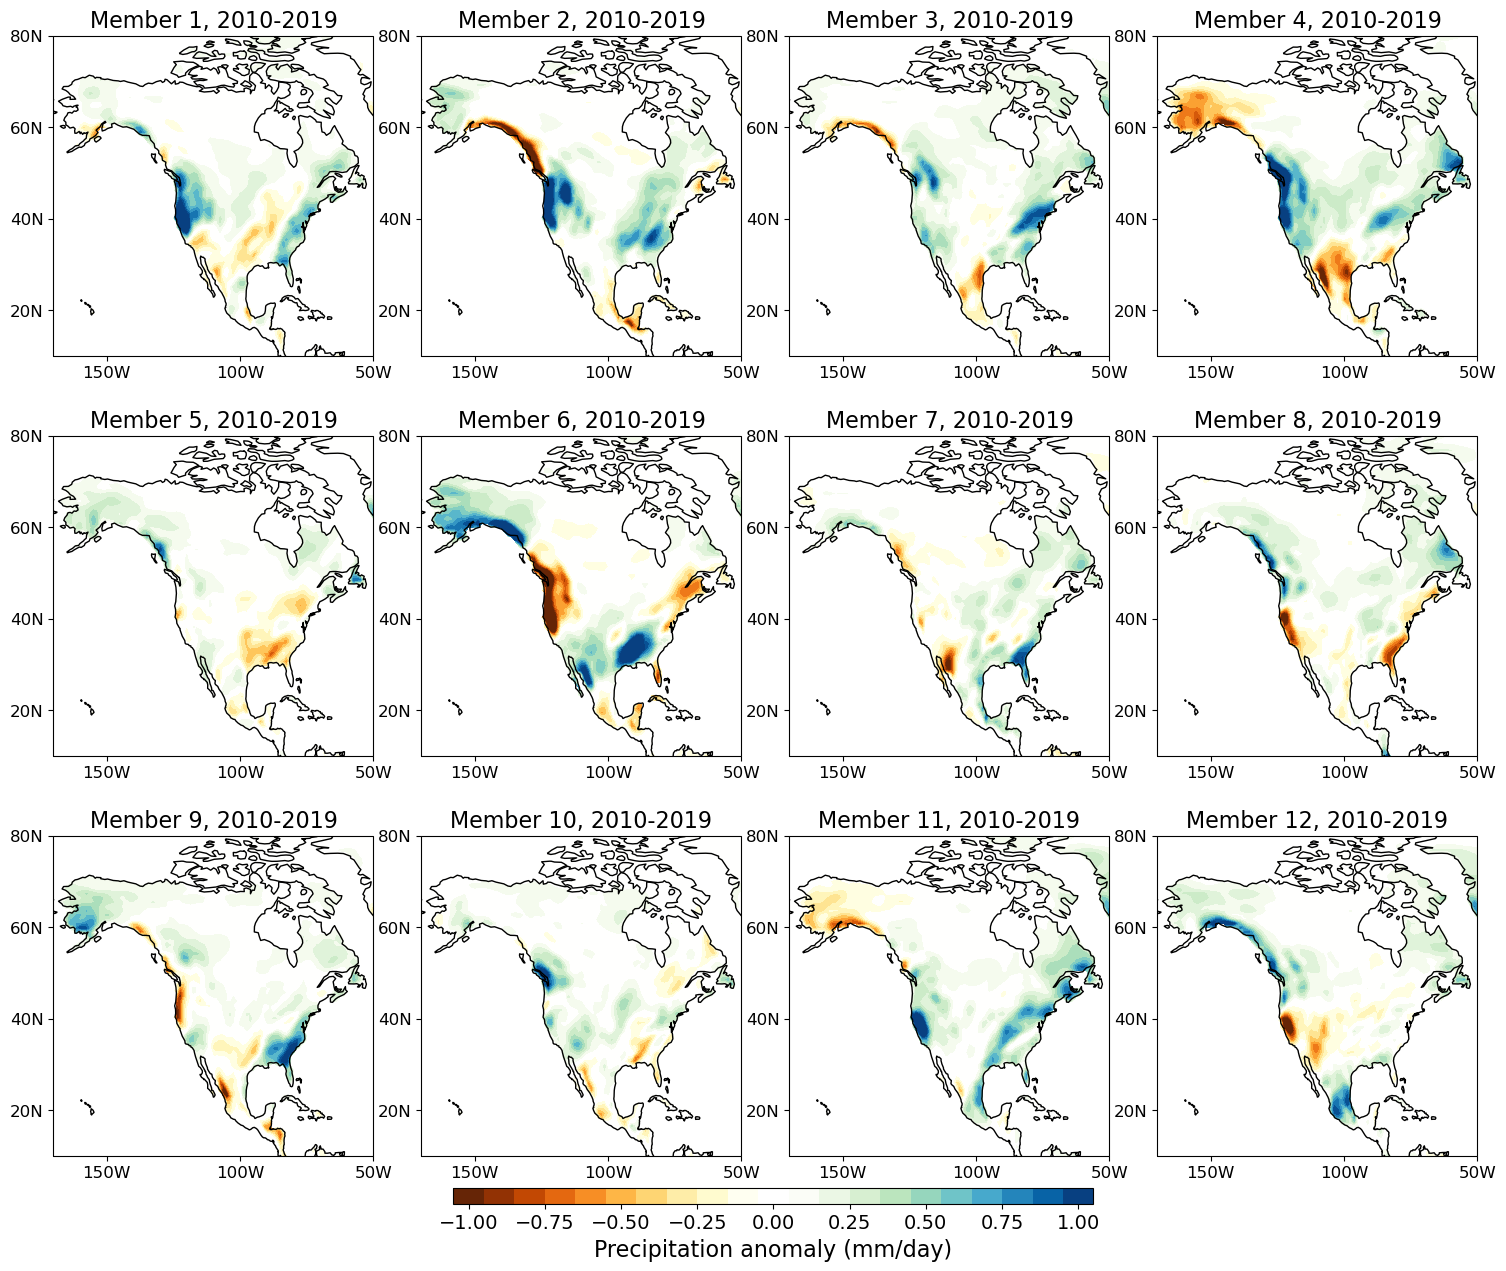

In [4]:
fig = plt.figure(figsize=(16,16))

start_year_of_decade = 2010
members=[1,2,3,4,5,6,7,8,9,10,11,12]

if (len(members) > 12):
    print("!!! This won't work.  Please choose only 9 or fewer members")
    sys.exit()
    
if (np.max(members) > 50):
    print("!!! This won't work.  You have chosen member "+str(np.max(members))+" which is out of range.  Choose members between 1 and 50")
    sys.exit()
    
if (  (start_year_of_decade < 1980) | (start_year_of_decade > 2091)):
    print("!!! This won't work, you can only look at decades between 1980 and 2100")
    sys.exit()


print("You're now going to look at the decade from "+str(start_year_of_decade)+" to "+str(start_year_of_decade+9))

fig = plot_prmap_members(fig, pr, start_year_of_decade, members)